In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import tensorflow as tf

In [2]:
df = pd.read_csv("diabetes.csv")
print(df.head())    

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


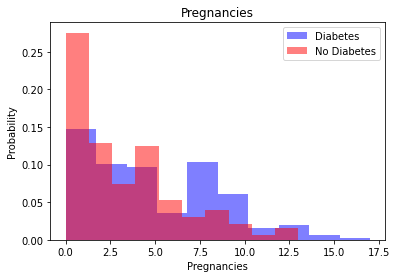

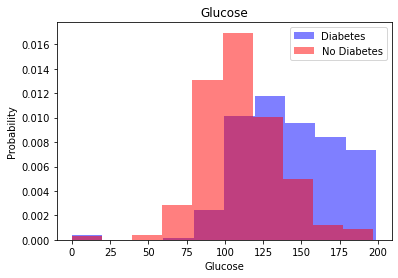

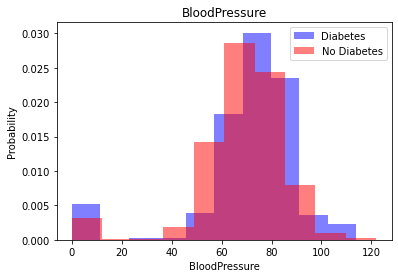

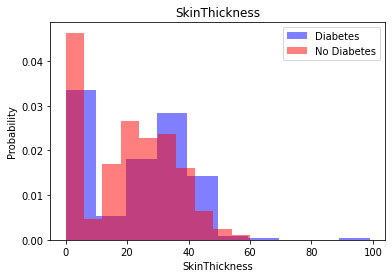

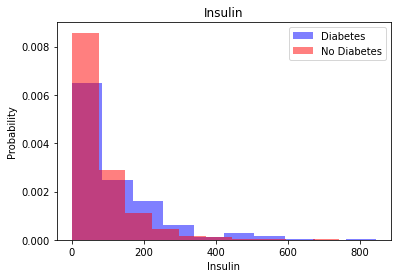

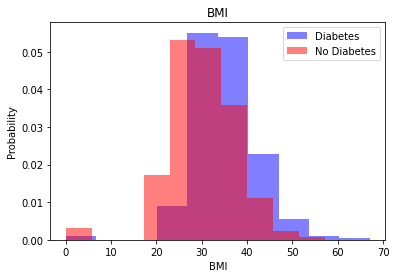

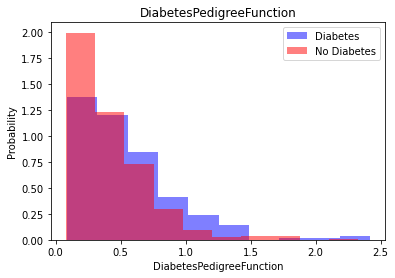

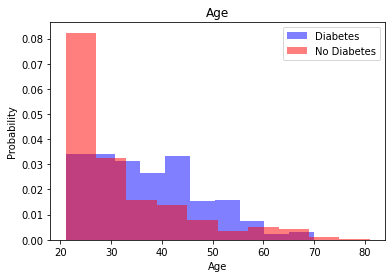

In [3]:
# plotting the data

for i in range(len(df.columns[:-1])): # until the last column
    label = df.columns[i] # column labels
    plt.hist(df[df['Outcome']==1][label], color="blue", label="Diabetes", alpha=0.5, density=True) # positive
    plt.hist(df[df['Outcome']==0][label], color="red", label="No Diabetes", alpha=0.5, density=True) # negative
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.title(label)
    plt.legend()
    plt.show()

In [4]:
x = df[df.columns[:-1]].values # matrix
y = df[df.columns[-1]].values # output column

In [5]:
# scale the quantities (normalize the data)
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [6]:
# make dataset balanced in terms of outcomes
over = RandomOverSampler()
x, y = over.fit_resample(x, y)

In [7]:
# 60% of the dataset for training, 20% for testing, 20% for validation
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, random_state=0) # training
x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=0) # validation

In [8]:
# build model (layers, activation functions)
model = tf.keras.Sequential ([
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') # used for binary classification
])

# compile model (optimizer, loss function, metrics)
model.compile (
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

# evaluation
model.evaluate(x_valid, y_valid)

7/7 [==============================] - 1s 1ms/step - loss: 0.7061 - accuracy: 0.5700


[0.7060732245445251, 0.5699999928474426]

In [9]:
# train the model
model.fit(
    x_train, 
    y_train, 
    batch_size=10, 
    epochs=10,
    validation_data=(x_valid, y_valid)
)

Epoch 1/10
60/60 [==============================] - 1s 2ms/step - loss: 0.6759 - accuracy: 0.6117 - val_loss: 0.6233 - val_accuracy: 0.6500
Epoch 2/10
60/60 [==============================] - 0s 2ms/step - loss: 0.6153 - accuracy: 0.6400 - val_loss: 0.5816 - val_accuracy: 0.7200
Epoch 3/10
60/60 [==============================] - 0s 2ms/step - loss: 0.5812 - accuracy: 0.7017 - val_loss: 0.5524 - val_accuracy: 0.7350
Epoch 4/10
60/60 [==============================] - 0s 1ms/step - loss: 0.5588 - accuracy: 0.7400 - val_loss: 0.5333 - val_accuracy: 0.7650
Epoch 5/10
60/60 [==============================] - 0s 1ms/step - loss: 0.5436 - accuracy: 0.7533 - val_loss: 0.5178 - val_accuracy: 0.7600
Epoch 6/10
60/60 [==============================] - 0s 1ms/step - loss: 0.5309 - accuracy: 0.7433 - val_loss: 0.5048 - val_accuracy: 0.7650
Epoch 7/10
60/60 [==============================] - 0s 2ms/step - loss: 0.5169 - accuracy: 0.7533 - val_loss: 0.4911 - val_accuracy: 0.7850
Epoch 8/10
60/60 [==

In [10]:
model.predict(x)[0]

32/32 [==============================] - 0s 1ms/step


array([0.7927605], dtype=float32)